# Medical Costs : How your profile affects your medical charges?


A dataset dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

### Columns

   - age: age of primary beneficiary

   - sex: insurance contractor gender, female, male

   - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

   - children: Number of children covered by health insurance / Number of dependents

   - smoker: Smoking

   - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

   - charges: Individual medical costs billed by health insurance


In [169]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import dirname,abspath,join
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Load the data

In [170]:
proj_dir = dirname(abspath('.'))
data_dir = join(proj_dir,'data')
insurance_file = join(data_dir,'insurance.csv')
ins = pd.read_csv(insurance_file)
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [171]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [172]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [173]:
ins.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### 1. Exploratory Data Analysis

### 1.1 Univariant analysis

In [174]:
def show_boxplot(col_data,x_label,y_label,title,fig_size=(7, 7),show_outlier=True):
    """
    shows boxplot with means
    params:
    col_data:list or numpy array
    x_label: str
    y_label: str
    title: str
    fig_size: tuple of (int,int)
    show_outlier: bool
    """
    
    plt.figure(figsize=fig_size)
    plt.boxplot(col_data,showmeans=True,showfliers=show_outlier)
    plt.title(title,fontsize=21,color='navy')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

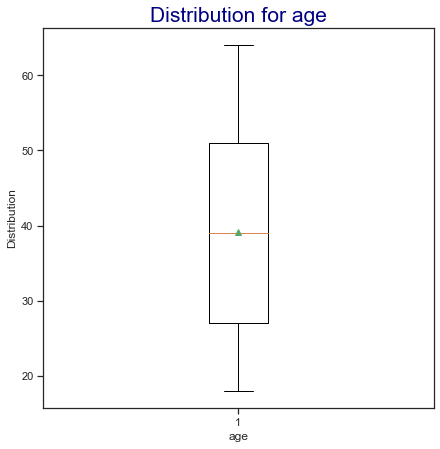

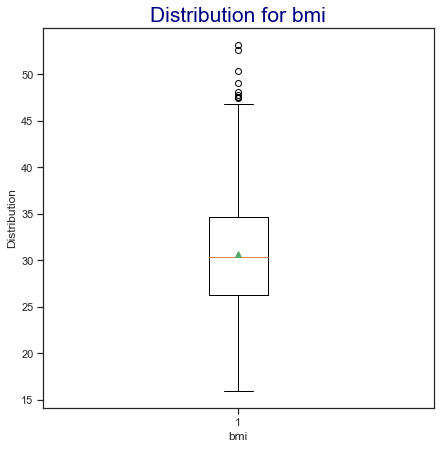

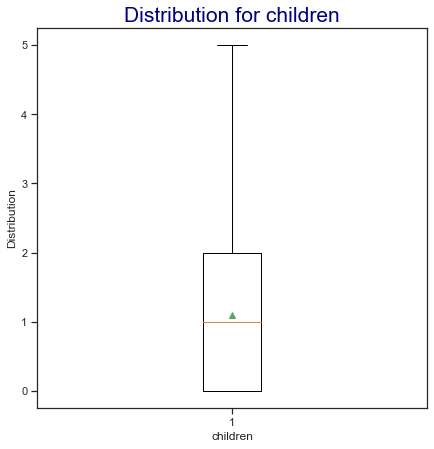

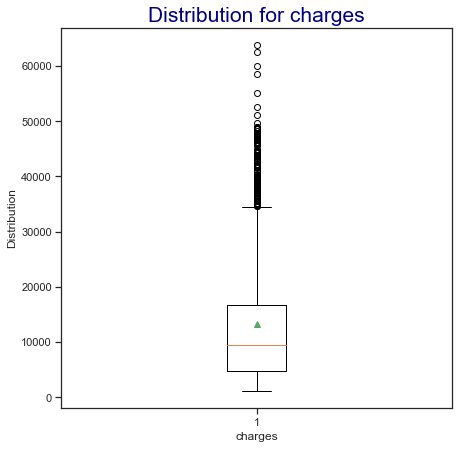

In [175]:
for col in ins.select_dtypes(include=np.number).columns:
    data=ins[col]
    x_label=col
    y_label='Distribution'
    title=f'Distribution for {col}'
    show_boxplot(col_data=data,x_label=x_label,y_label=y_label,title=title)

In [176]:
def show_barchart(x,y,x_label,y_label,title,fig_size=(7, 7)):
    """
    shows boxplot with means
    params:
    col_data:list or numpy array
    x_label: str
    y_label: str
    title: str
    fig_size: tuple of (int,int)
    show_outlier: bool
    """
    
    plt.figure(figsize=fig_size)
    y.plot(kind='bar')
    plt.title(title,fontsize=21,color='navy')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

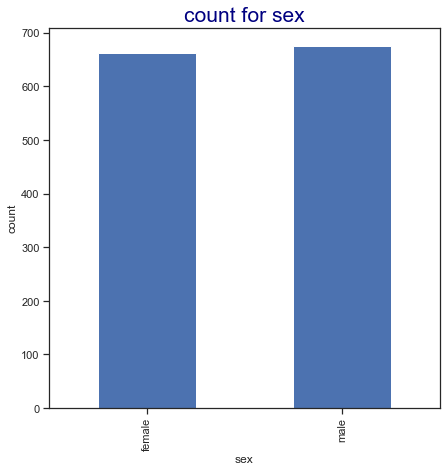

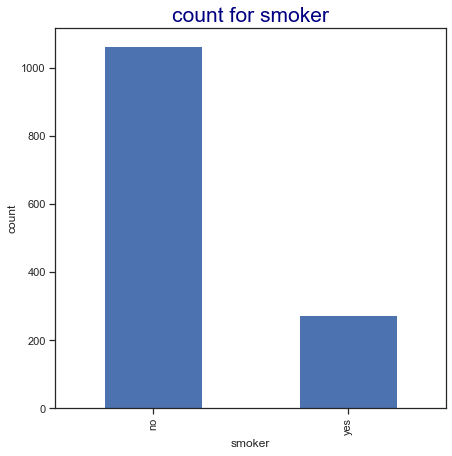

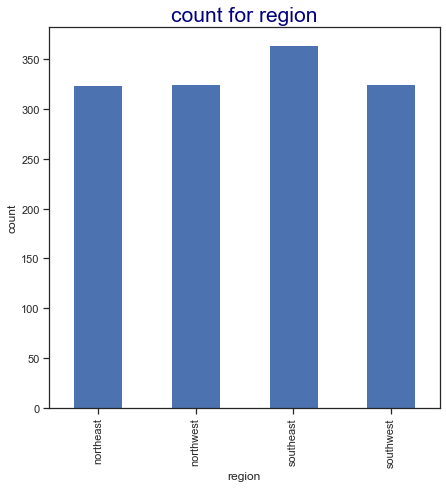

In [177]:
for col in ins.select_dtypes(exclude=np.number).columns:
    data=ins[col]
    data_1 = ins.groupby(by = col).size()
    x_label=col
    y_label='count'
    title=f'count for {col}'
    show_barchart(x=data,y=data_1,x_label=x_label,y_label=y_label,title=title)

#### 1.2 Examining the Relationship of Charges to the Categorical Features



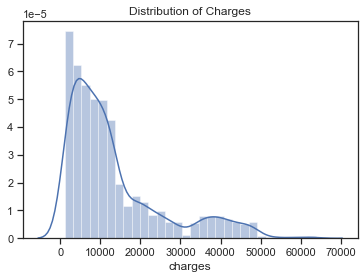

In [178]:
sns.distplot(ins['charges'])
plt.title('Distribution of Charges')
plt.show()

##### Insight: The graph shows it is skewed to the right. We can tell visually that there may be outliers (the maximum charge is at $63,770). Let us examine again this time between the groups.

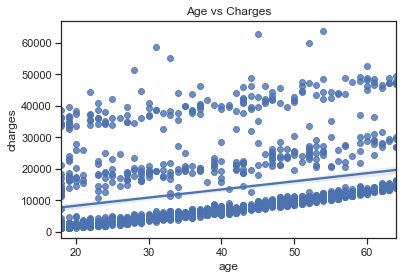

In [179]:
# Does charges increase with age?
sns.regplot(x=ins['age'], y=ins['charges'])
plt.title('Age vs Charges')
plt.show()

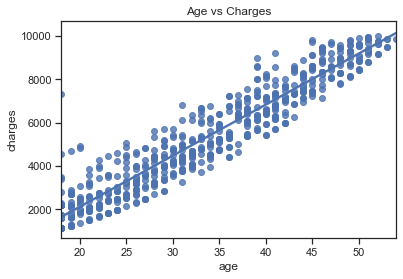

In [180]:
tmp2=ins[ins['charges']<10001]
sns.regplot(x=tmp2['age'], y=tmp2['charges'])
plt.title('Age vs Charges')
plt.show()

In [181]:
tmp2['age'].corr(tmp2['charges'])

0.9570132068175323


#### 1.3 Charges Between Gender


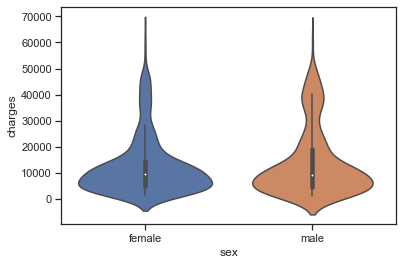

In [182]:
sns.violinplot(x=ins['sex'],y=ins['charges'])
plt.show()

In [183]:
mean_sex=ins.groupby('sex')['charges'].mean()
print(mean_sex)
diff_sex=mean_sex['male']-mean_sex['female']
print(diff_sex)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
1387.1723338865468



##### Insight: There is not much difference between gender based on the violin plot. For males, the average charge is "slightly" higher compared to female counterparts with the difference of around $1387.


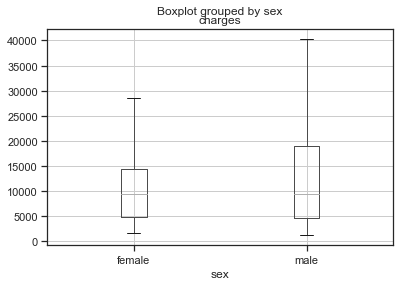

In [184]:
ins.boxplot(column='charges',by='sex',showfliers=False)

#### 1.4 Charges between Smokers and non-Smokers

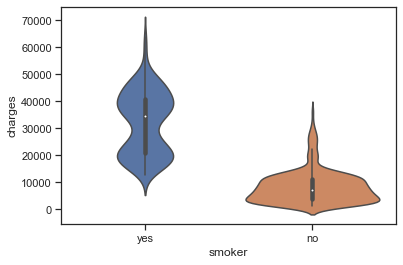

In [185]:
sns.violinplot(x=ins['smoker'],y=ins['charges'])
plt.show()

In [186]:
mean_smoker=ins.groupby('smoker')['charges'].mean()
print(mean_smoker)
diff_smoker=mean_smoker['yes']-mean_smoker['no']
print(diff_smoker)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
23615.96353367665


##### Insight: Ok, so there's around $23,615 difference between smokers and non-smokers. Smoking is very expensive indeed.


#### 1.5 Charges Among Regions

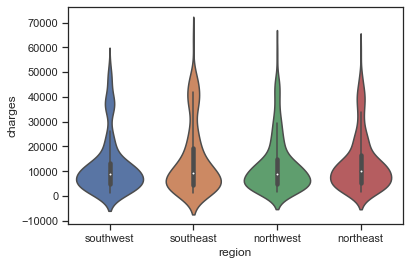

In [187]:
sns.violinplot(x=ins['region'],y=ins['charges'])

In [188]:
mean_region=ins.groupby('region')['charges'].mean()
print(mean_region)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


##### Insight: As with the gender, region groups also does not show much difference between them based on the plot. Even so, the individuals from the Southeast has charged more on there bills.

#### 1.6 In Relation to Other Features

The following shows the relationship of the medical charges to other numerical variables.

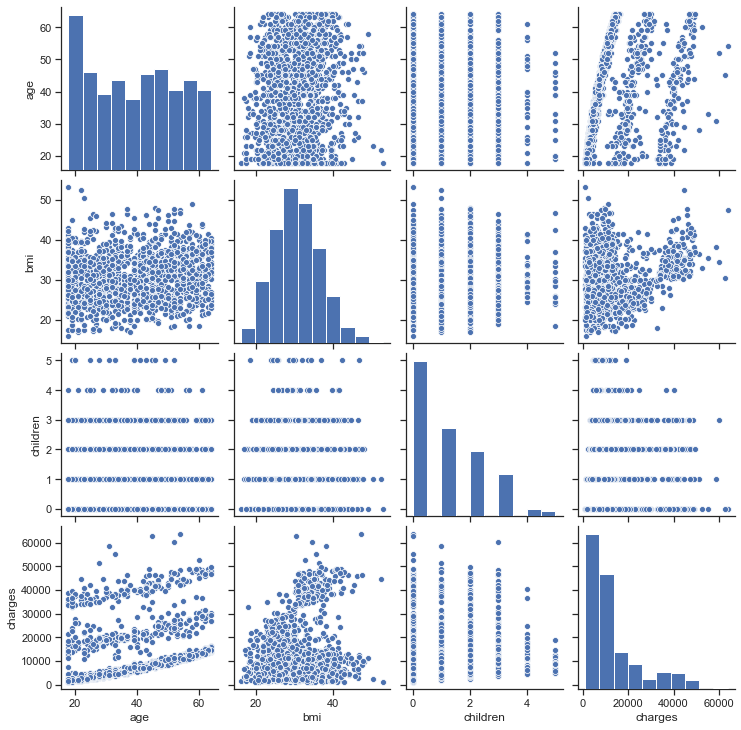

In [189]:
sns.pairplot(ins)

##### Insight: Let us focus on the following relationships (first 3 charts in the bottom row):

  - charges vs age - it is apparent the that charges are higher to older individuals.
  
  - charges vs bmi - BMIs greater than 30 is considered obesed. The chart shows a group of individuals with BMI > 30 are charged higher
  - charges vs no children - those who has more children tends to have been charged lower than those who don't have.


#### 1.7 Smokers vs Non- Smokers

Based on the violin plot we have noticed a big difference in charges between the smokers and non-smokers. Let us look further on this relationship complemented with other numerical variables.

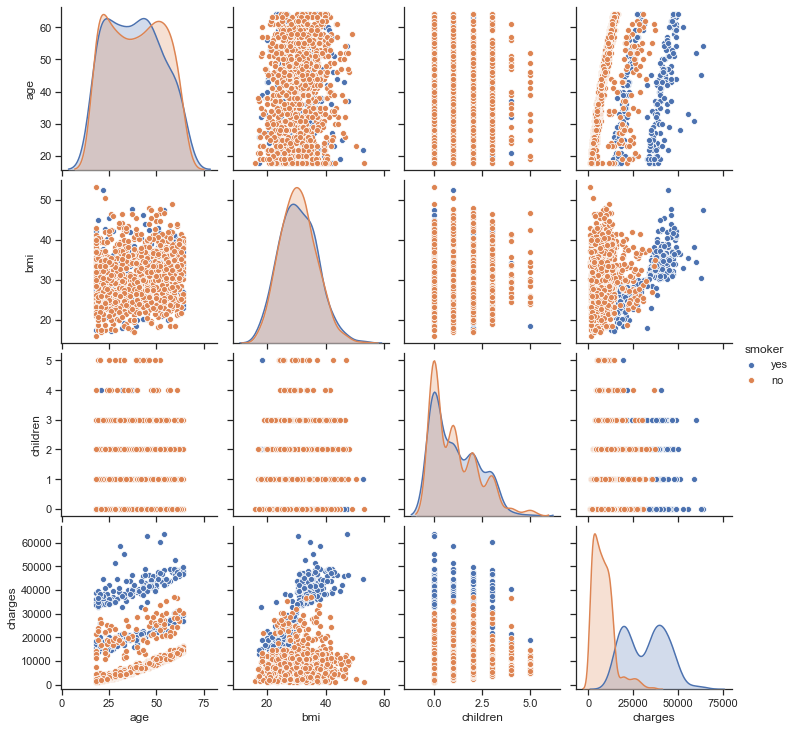

In [190]:
sns.set(style='ticks')
smokerPairs = sns.pairplot(ins, hue = "smoker")


##### Insight: Focusing again on the first 3 charts in the bottom row, we can say that the higher amount of charges are dominated by blue points which are represented by smokers.

### 2. Pre-Processing the Data

In [191]:
ScaleMinMAx=MinMaxScaler()


In [192]:
ins[['age','bmi','children']]=ScaleMinMAx.fit_transform(ins[['age','bmi','children']])
ins

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,10600.54830
1334,0.000000,female,0.429379,0.0,no,northeast,2205.98080
1335,0.000000,female,0.562012,0.0,no,southeast,1629.83350
1336,0.065217,female,0.264730,0.0,no,southwest,2007.94500


In [193]:
ins=pd.get_dummies(ins,columns=['smoker', 'sex', 'region'],drop_first=True)
ins

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,1,0,0,0,1
1,0.000000,0.479150,0.2,1725.55230,0,1,0,1,0
2,0.217391,0.458434,0.6,4449.46200,0,1,0,1,0
3,0.326087,0.181464,0.0,21984.47061,0,1,1,0,0
4,0.304348,0.347592,0.0,3866.85520,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,0,1,1,0,0
1334,0.000000,0.429379,0.0,2205.98080,0,0,0,0,0
1335,0.000000,0.562012,0.0,1629.83350,0,0,0,1,0
1336,0.065217,0.264730,0.0,2007.94500,0,0,0,0,1


### 3. Quantifying the effect of the features to the medical charges

We have already visualized the relationship of the variables to the charges. Now we will further investigate by looking at the relationships using multiple linear regression. Remember that the aim of this section is to quantify the relationship and not to create the prediction model. Let us first create a training and testing data set to proceed.

Based on the visualization, we can make a couple of hypothesis about the relationship.


   - There is no real difference in charges between gender or regions.
    
   - The charge for smokers are very much higher than the non-smokers.
    
   - The charge gets higher as the individual gets older.
    
   - The charge gets higher as the individual reaches over 30BMI.
    
   - Lastly, the charge is higher for those who have fewer number of children.

In [200]:
#X=ins.drop(ins.columns[[3]],axis=1)
X=ins.drop('charges',axis=1)
Y=ins['charges']
X_train,x_test,Y_train,y_test=train_test_split(X,Y)

In [203]:
import statsmodels.api as sm
from scipy import stats

X_train2=sm.add_constant(X_train)
linearModel=sm.OLS(Y_train,X_train2)
linear=linearModel.fit()
print(linear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     379.2
Date:                Wed, 22 Jul 2020   Prob (F-statistic):          8.99e-296
Time:                        14:38:35   Log-Likelihood:                -10137.
No. Observations:                1003   AIC:                         2.029e+04
Df Residuals:                     994   BIC:                         2.034e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2163.9476    665.722  

So we have generated a linear model. Let us see how our initial hypothesis fared with the actual result.

   - There is no real difference in charges between gender or regions.
   - Result: The p-value is 0.973 indicating there is no statistical difference between the gender or region group.
   - The charge for smokers are very much higher than the non-smokers.
   - Result: The p-value is 0.000 which indicates that there is a difference between the group.
   - The charge gets higher as the individual gets older.</b> Result: The p-value is 0.000 which indicates that the charge is higher as the individual gets older.
   - The charge gers higher as the BMI gets higher.
   - Result: The p-values is 0.000 which indicates that the charge is higher as the BMI gets higher.
   - Lastly, there is significant decrease in charges as the number of children increases.
   - Result: The p-value is 0.007. Interestingly, the coefficient is 2,211 which means that the charge gets higher as the individual has more number of childre. The initial hypothesis is incorrect. This is essentially the reason why we can't solely rely on visualization in generating conclusions.



### 4. Basic Machine Learning: Comparison Between Selected Regression Models


In [205]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [206]:
lr=LinearRegression()
la=Lasso()
ri=Ridge()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()

In [213]:
models=[
    ('Linear Regression',lr),
    ('Lasso', la),
    ('Ridge',ri)
]

In [214]:
for m in models:
    name=m[0]
    model=m[1]
    model.fit(X_train,Y_train)
    y_pred=model.predict(x_test)
    print("Results for",name)
    print(round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    
    

Results for Linear Regression
6403.45
Results for Lasso
6403.84
Results for Ridge
6411.29


### Conclusion

We have found out that region and gender does not bring significant difference on charges among its groups. Age, BMI, number of children and smoking are the once that drives the charges. The statistical relationship between number of children and charges is surprisingly different from our visualization. Meanwhile, linear regression has edged the regularized regression models in giving the best prediction. This proves that regularized regression models are not guaranteed to be superior to linear regressions.